In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import datetime

In [22]:
data = pd.read_csv('Uber Drives - .csv')
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [ ]:
#cleaning the data

In [23]:
data.isnull().any()

START_DATE*    False
END_DATE*       True
CATEGORY*       True
START*          True
STOP*           True
MILES*         False
PURPOSE*        True
dtype: bool

In [24]:
data.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [25]:
data = data.dropna()

In [26]:
data.isnull().sum()

START_DATE*    0
END_DATE*      0
CATEGORY*      0
START*         0
STOP*          0
MILES*         0
PURPOSE*       0
dtype: int64

In [27]:
data.dtypes

START_DATE*     object
END_DATE*       object
CATEGORY*       object
START*          object
STOP*           object
MILES*         float64
PURPOSE*        object
dtype: object

In [28]:
data['START_DATE*'] = pd.to_datetime(data['START_DATE*'],format = '%m/%d/%Y %H:%M')
data['END_DATE*'] = pd.to_datetime(data['END_DATE*'], format = '%m/%d/%Y %H:%M')

In [29]:
data.dtypes

START_DATE*    datetime64[ns]
END_DATE*      datetime64[ns]
CATEGORY*              object
START*                 object
STOP*                  object
MILES*                float64
PURPOSE*               object
dtype: object

In [30]:
hour = []
day = []
dayofweek = []
month = []
weekday = []

for x in data['START_DATE*']:
    hour.append(x.hour)
    day.append(x.day)
    dayofweek.append(x.dayofweek)
    month.append(x.month)
    weekday.append(calendar.day_name[dayofweek[-1]])
    
data['HOUR'] = hour
data['DAY'] = day
data['DAY OF WEEK'] = dayofweek
data['MONTH'] = month
data['WEEKDAY'] = weekday

In [31]:
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,DAY OF WEEK,MONTH,WEEKDAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,2,1,Wednesday


In [32]:
data['CATEGORY*'].value_counts()

Business    647
Personal      6
Name: CATEGORY*, dtype: int64

<AxesSubplot: xlabel='CATEGORY*', ylabel='count'>

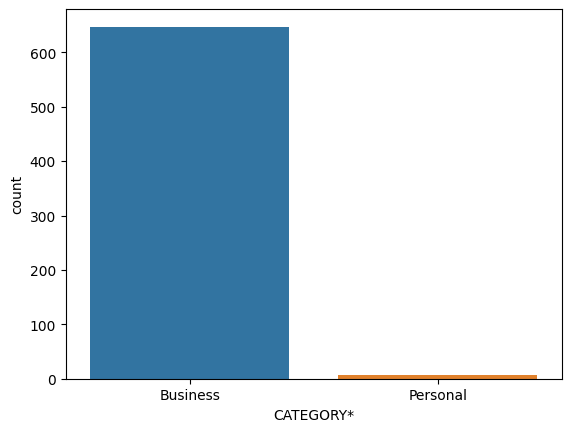

In [37]:
# Show the purpose of booking Uber
sns.countplot(x = 'CATEGORY*',data = data)

<AxesSubplot: ylabel='Frequency'>

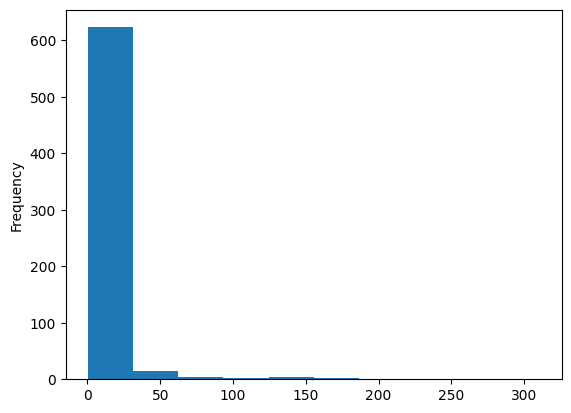

In [38]:
# How long do people travel with Uber?
data['MILES*'].plot.hist()

Text(0.5, 1.0, 'Number of trips vs hours')

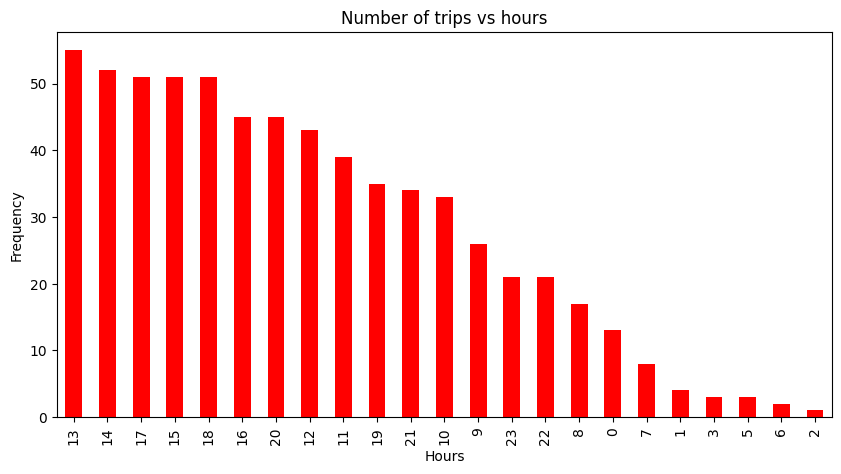

In [41]:
# What hour do most people take uber to their destination?
hours = data['START_DATE*'].dt.hour.value_counts()
hours.plot(kind = 'bar', color = 'red', figsize = (10,5))

plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Number of trips vs hours')

Text(0, 0.5, 'trips')

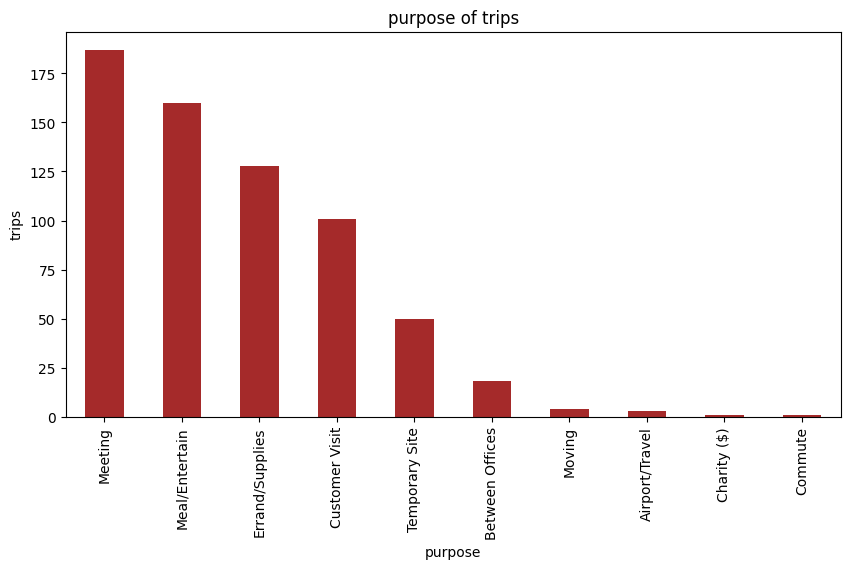

In [54]:
#Check the purpose of trips
data['PURPOSE*'].value_counts().plot(kind='bar',figsize=(10,5),color='brown')
plt.title('purpose of trips')
plt.xlabel('purpose')
plt.ylabel('trips')

Text(0.5, 1.0, 'day has the highest number of trip')

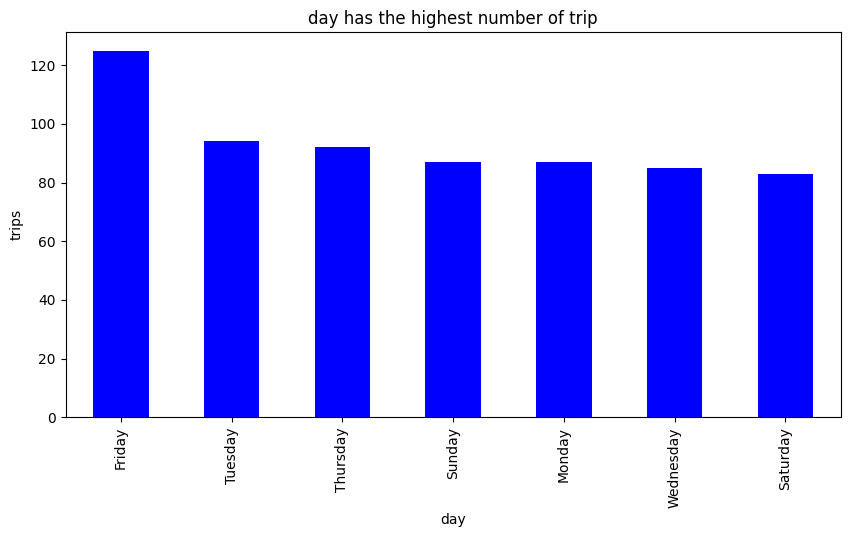

In [53]:
#Which day has the highest number of trips
data['WEEKDAY'].value_counts().plot(kind='bar',figsize=(10,5),color='blue')

plt.xlabel('day')
plt.ylabel('trips')
plt.title('day has the highest number of trip')

Text(0, 0.5, 'trips')

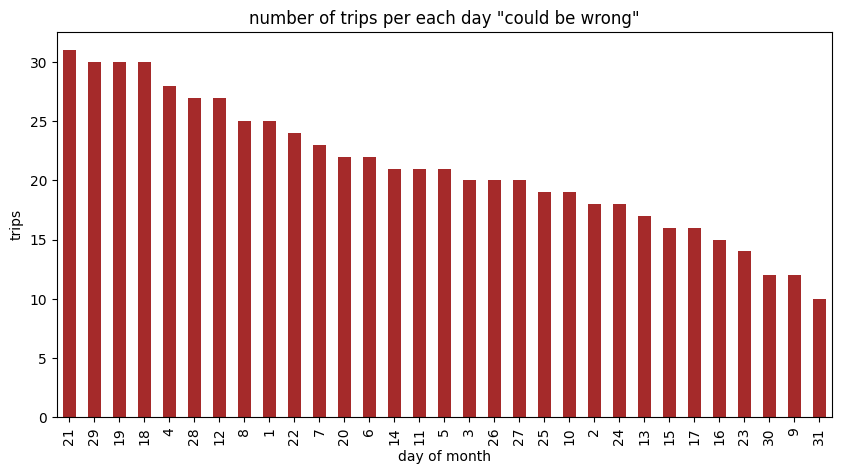

In [55]:
#What are the number of trips per each day?
data['DAY'].value_counts().plot(kind='bar',figsize=(10,5),color='brown')
plt.title('number of trips per each day "could be wrong"')
plt.xlabel('day of month')
plt.ylabel('trips')

Text(0, 0.5, 'trip')

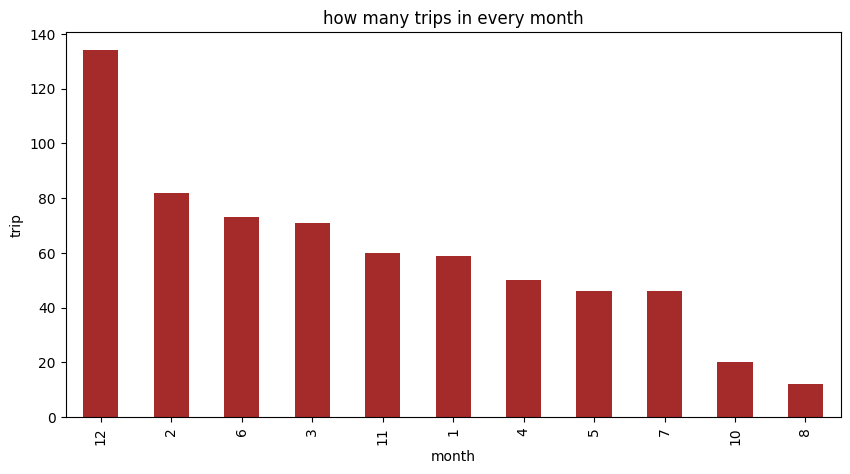

In [56]:
#What are the trips in the month "how many trips in every month"
data['MONTH'].value_counts().plot(kind='bar',figsize=(10,5),color='brown')

plt.title('how many trips in every month')
plt.xlabel('month')
plt.ylabel('trip')

Text(0, 0.5, 'trip')

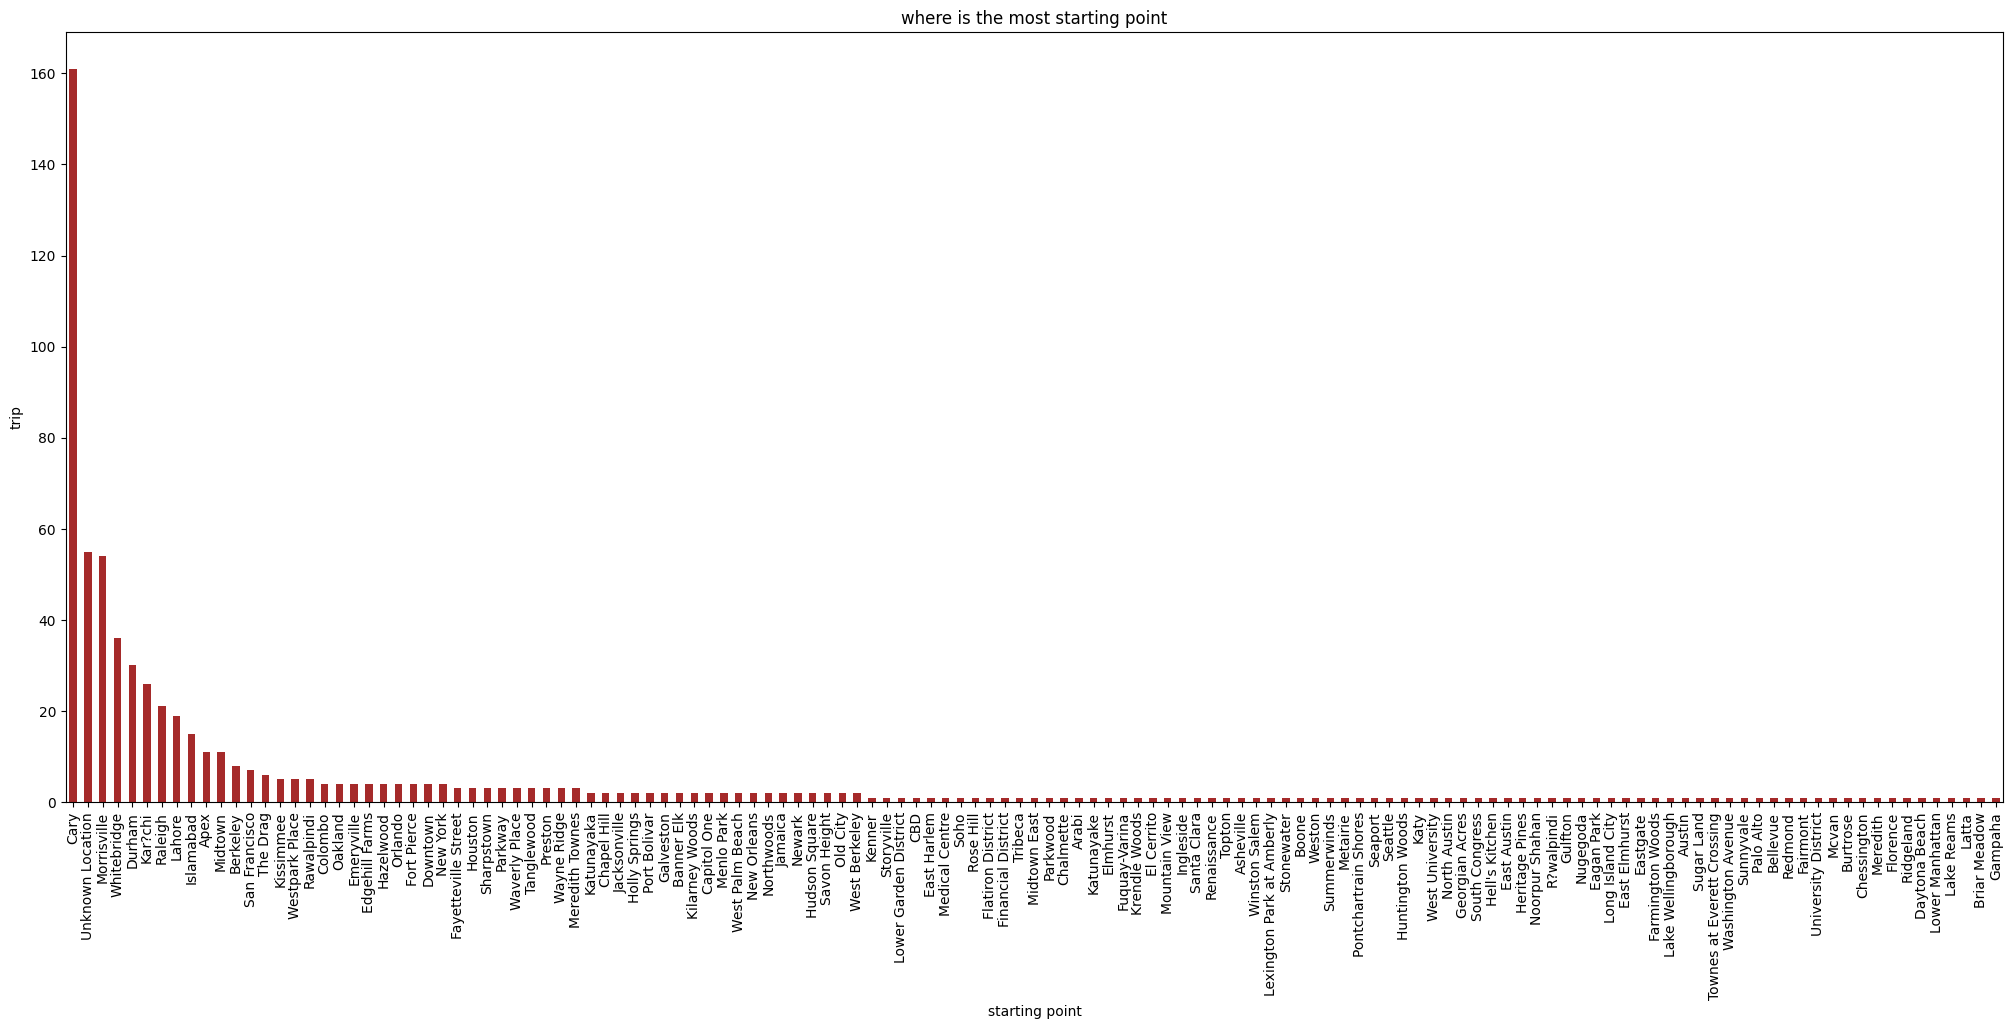

In [57]:
#The starting points of trips. Where do people start boarding their trip from most?
data['START*'].value_counts().plot(kind='bar',figsize=(25,10),color='brown')

plt.title('where is the most starting point')
plt.xlabel('starting point')
plt.ylabel('trip')